In [1]:
import torch
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

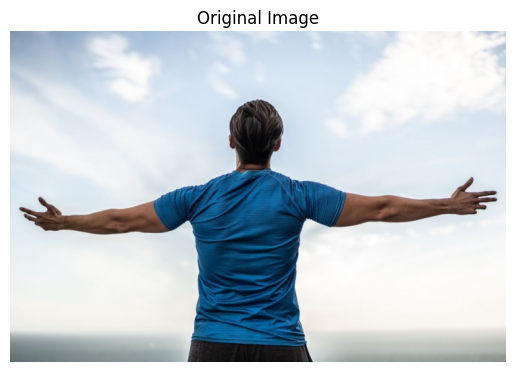

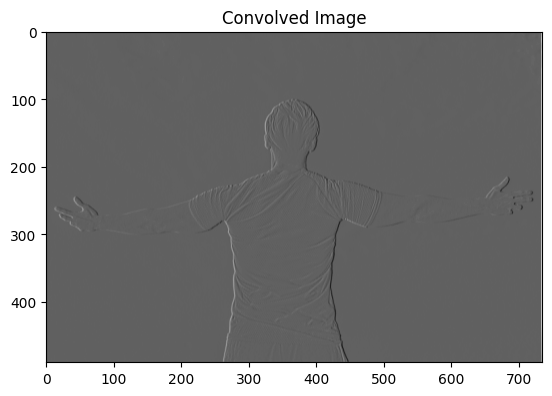

In [34]:
def conv2d(input, weight, bias=None, stride=1, padding=0):
    batch_size, in_channels, in_height, in_width = input.shape
    out_channels, _, kernel_height, kernel_width = weight.shape

    # Рассчитываем размеры выходного изображения
    out_height = (in_height + 2 * padding - kernel_height) // stride + 1
    out_width = (in_width + 2 * padding - kernel_width) // stride + 1

    # Создаем массив для хранения выходных данных
    output = np.zeros((batch_size, out_channels, out_height, out_width))

    # Добавляем padding, если нужно
    if padding > 0:
        input = np.pad(input, ((0, 0), (0, 0), (padding, padding), (padding, padding)), mode='constant')

    # Проходим по изображениям в батче
    for batch_idx in range(batch_size):
        # Проходим по выходным каналам
        for out_channel in range(out_channels):
            # Проходим по выходным пикселям
            for y_out in range(out_height):
                for x_out in range(out_width):
                    # Вычисляем координаты начального и конечного пикселя для свертки
                    y_start = y_out * stride
                    y_end = y_start + kernel_height
                    x_start = x_out * stride
                    x_end = x_start + kernel_width

                    # Выполняем свертку для текущего пикселя
                    output[batch_idx, out_channel, y_out, x_out] = np.tensordot(
                        input[batch_idx, :, y_start:y_end, x_start:x_end],
                        weight[out_channel], axes=([0, 1, 2], [0, 1, 2])
                    )

            # Добавляем bias, если он задан
            if bias is not None:
                output[batch_idx, out_channel] += bias[out_channel]
    return output

img = Image.open('chelovek.jpg')
# Преобразование изображения в массив чисел (numpy array)
img_array = np.array(img)
img_gray = np.dot(img_array[..., :3], [0.2989, 0.5870, 0.1140])  # Преобразование в оттенки серого
# Преобразование массива чисел в тензор
img_tensor = torch.tensor(img_gray, dtype=torch.float32)
img_tensor = img_tensor.unsqueeze(0).unsqueeze(0) / 255.0  # Добавление размерности батча и нормализация
# Определение фильтра для свертки (ядра свертки)
filter_weights = torch.tensor([[0.0, 1.0, -1.0],
                               [0.0, 1.0, -1.0],
                               [0.0, 1.0, -1.0]])
filter_weights = filter_weights.unsqueeze(0).unsqueeze(0)

plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.show()

put = conv2d(img_tensor, filter_weights, stride=1, padding=1)
output_image = put.squeeze()
plt.imshow(output_image, cmap='gray')
plt.title('Convolved Image')
plt.show()

In [38]:
def test_1():
    # Создание простого изображения (матрицы) для свертки
    image = np.array([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]])
    # Простое ядро (фильтр) для свертки
    kernel = np.array([[1, 0, -1],
                       [1, 0, -1],
                       [1, 0, -1]])
    image_tensor = torch.from_numpy(image).unsqueeze(0).unsqueeze(0).float()  # Добавление размерностей для батча и каналов
    kernel_tensor = torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0).float()  # Добавление размерностей для каналов
    # Ожидаемый результат при использовании torch.nn.functional.conv2d
    expected_result_pytorch = F.conv2d(image_tensor, kernel_tensor, padding=0)
    # Ожидаемый результат при использовании моего метода
    expected_result_custom = conv2d(image_tensor, kernel_tensor)
    # Сравнение результатов
    assert np.array_equal(expected_result_pytorch.numpy(), expected_result_custom), "Результаты не совпадают"

def test_2():
    # Создание простого изображения (матрицы) для свертки
    image = np.array([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]])

    # Создание ядра Гаусса для свертки
    kernel = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]])
    image_tensor = torch.from_numpy(image).unsqueeze(0).unsqueeze(0).float()  # Добавление размерностей для батча и каналов
    kernel_tensor = torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0).float()  # Добавление размерностей для каналов
    # Ожидаемый результат при использовании torch.nn.functional.conv2d
    expected_result_pytorch = F.conv2d(image_tensor, kernel_tensor, padding=0)
    # Ожидаемый результат при использовании моего метода
    expected_result_custom = conv2d(image_tensor, kernel_tensor)
    # Сравнение результатов
    assert np.array_equal(expected_result_pytorch.numpy(), expected_result_custom), "Результаты не совпадают"

def test_3():
    # Создание простого изображения (матрицы) для свертки
    image = np.array([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]])

    # Создание ядра усреднения для свертки
    kernel = np.array([[0.111, 0.111, 0.111],
                            [0.111, 0.111, 0.111],
                            [0.111, 0.111, 0.111]])
    image_tensor = torch.from_numpy(image).unsqueeze(0).unsqueeze(0).float()  # Добавление размерностей для батча и каналов
    kernel_tensor = torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0).float()  # Добавление размерностей для каналов
    # Ожидаемый результат при использовании torch.nn.functional.conv2d
    expected_result_pytorch = F.conv2d(image_tensor, kernel_tensor, padding=0)
    # Ожидаемый результат при использовании моего метода
    expected_result_custom = conv2d(image_tensor, kernel_tensor)
    # Сравнение результатов
    assert np.array_equal(expected_result_pytorch.numpy(), expected_result_custom), "Результаты не совпадают"

test_1()
test_2()
test_3()